In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2001 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_01(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_s.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m01=Minuit(twi_minus_loglikelihood_01,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,-1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m01.migrad()

pprint(m01.fval)

FCN = -270.1112370996174 
 TOTAL NCALL = 179 
 NCALLS = 179 
 
 
 EDM = 4.140761596531498e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.16831,0.113314,,,-3,-1,No
1,log_f_b,-3.38942,0.110983,,,-5,-2,No
2,alpha_H,3.39395,0.412961,,,1,5,No
3,log_poisson,-0.708044,0.0196527,,,-3,3,No


-270.1112370996174


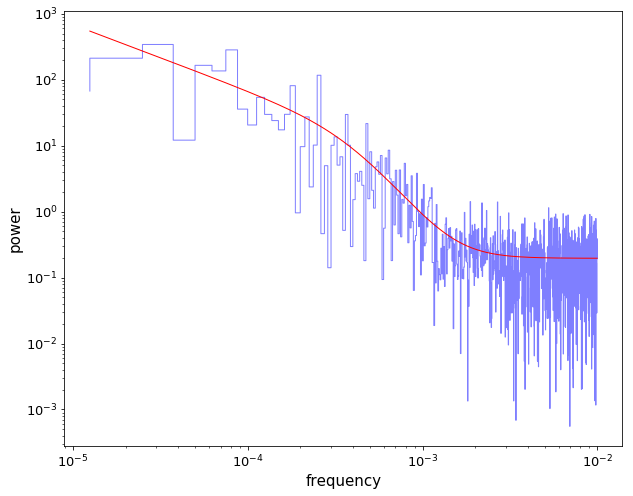

In [4]:
perdata01 = pd.read_csv("perlist01_s.csv")
f_01 = perdata01['f']
per_01 = perdata01['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m01.values[0],m01.values[1],m01.values[2],m01.values[3]

model_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_01.append(((f_01[i]**(-alpha_L))/(1+(f_01[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2001 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_01(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_s.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n01=Minuit(twi_minus_loglikelihood_nobreak_01,log_A=-9,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-10,-3),limit_alpha=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n01.migrad()

print(n01.fval)

FCN = -245.49382487040174 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 3.1551645443717224e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-6.85589,0.355333,,,-10,-3,No
1,alpha,2.23634,0.111308,,,1,5,No
2,log_poisson,-0.745372,0.0216432,,,-3,3,No


-245.49382487040174


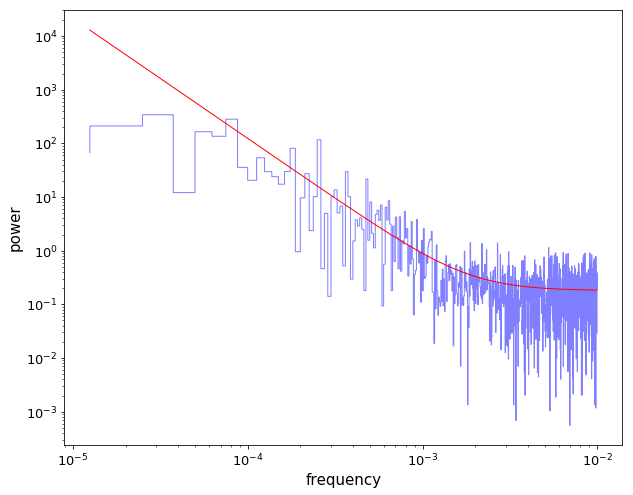

In [7]:
log_A,alpha,log_poisson = n01.values[0],n01.values[1],n01.values[2]

model_nob_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_nob_01.append((f_01[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_nob_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

24.617412229215688


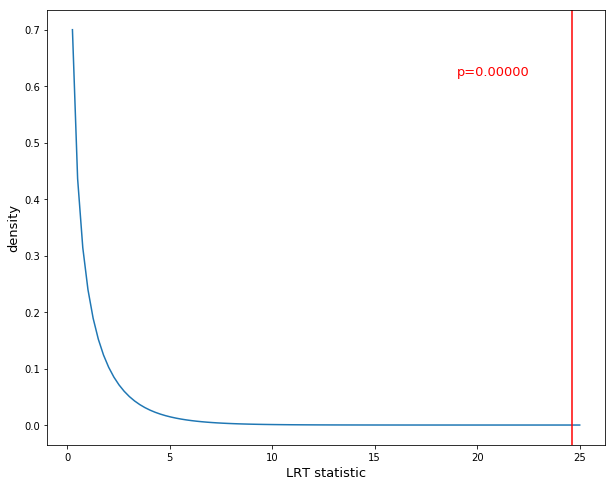

In [8]:
import scipy.stats as stats

# LRT statistic
T = n01.fval-m01.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2005(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_051(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata051 = pd.read_csv("perlist051_s.csv")
    f = perdata051['f']
    per = perdata051['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata051)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m051=Minuit(twi_minus_loglikelihood_051,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,0), limit_log_f_b=(-6,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m051.migrad()

pprint(m051.fval)

FCN = 1783.575262946888 
 TOTAL NCALL = 200 
 NCALLS = 200 
 
 
 EDM = 4.74932019915566e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.70481,0.655672,,,-3,0,No
1,log_f_b,-4.32821,1.00356,,,-6,-2,No
2,alpha_H,2.15756,0.495727,,,1,5,No
3,log_poisson,0.0271452,0.0207629,,,-3,3,No


1783.575262946888


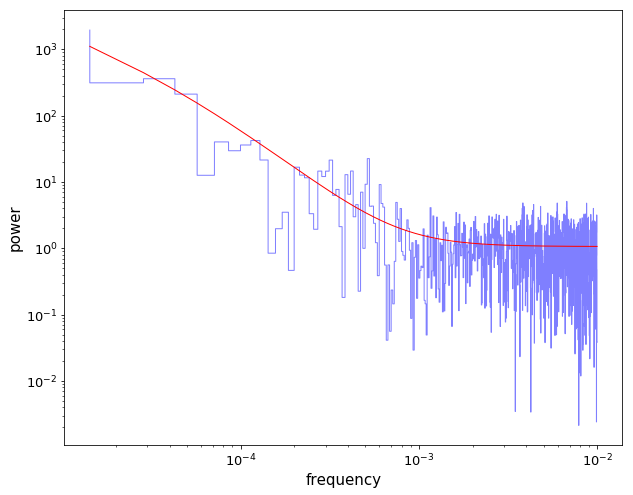

In [11]:
perdata051 = pd.read_csv("perlist051_s.csv")
f_051 = perdata051['f']
per_051 = perdata051['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m051.values[0],m051.values[1],m051.values[2],m051.values[3]

model_051 = []
f_length_051 = len(f_051)
for i in range(f_length_051):
    model_051.append(((f_051[i]**(-alpha_L))/(1+(f_051[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_051, per_051, color="b", alpha=0.5, linewidth=1)
plt.plot(f_051, model_051, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2005(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_051(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata051 = pd.read_csv("perlist051_s.csv")
    f = perdata051['f']
    per = perdata051['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata051)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n051=Minuit(twi_minus_loglikelihood_nobreak_051,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-9,-2),limit_alpha=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n051.migrad()

pprint(n051.fval)

FCN = 1784.0424351135173 
 TOTAL NCALL = 86 
 NCALLS = 86 
 
 
 EDM = 3.7130937097173414e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.90513,0.535548,,,-9,-2,No
1,alpha,1.90178,0.152714,,,1,5,No
2,log_poisson,0.0213142,0.0198125,,,-3,3,No


1784.0424351135173


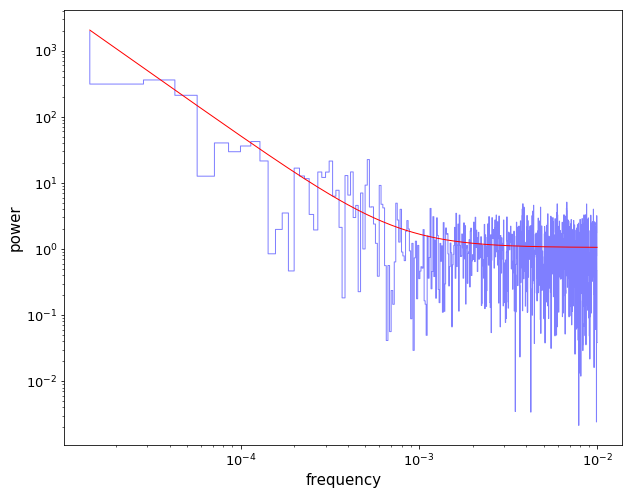

In [14]:
log_A,alpha,log_poisson = n051.values[0],n051.values[1],n051.values[2]

model_nob_051 = []
f_length_051 = len(f_051)
for i in range(f_length_051):
    model_nob_051.append((f_051[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_051, per_051, color="b", alpha=0.5, linewidth=1)
plt.plot(f_051, model_nob_051, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.46717216662932515


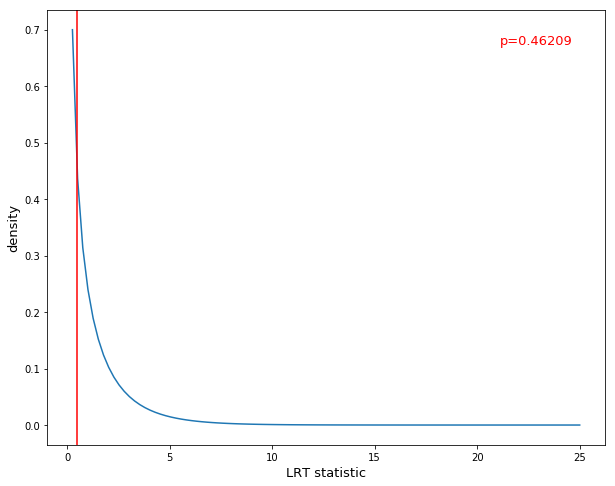

In [15]:
import scipy.stats as stats

# LRT statistic
T = n051.fval-m051.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2005(4) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_054(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata054 = pd.read_csv("perlist054_s.csv")
    f = perdata054['f']
    per = perdata054['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata054)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m054=Minuit(twi_minus_loglikelihood_054,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,0), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m054.migrad()

pprint(m054.fval)

FCN = 471.52155248710056 
 TOTAL NCALL = 195 
 NCALLS = 195 
 
 
 EDM = 7.245715594687858e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.23668,0.112811,,,-3,0,No
1,log_f_b,-3.32702,0.104424,,,-5,-2,No
2,alpha_H,4.24562,0.877822,,,1,5,No
3,log_poisson,-0.426811,0.0187823,,,-3,3,No


471.52155248710056


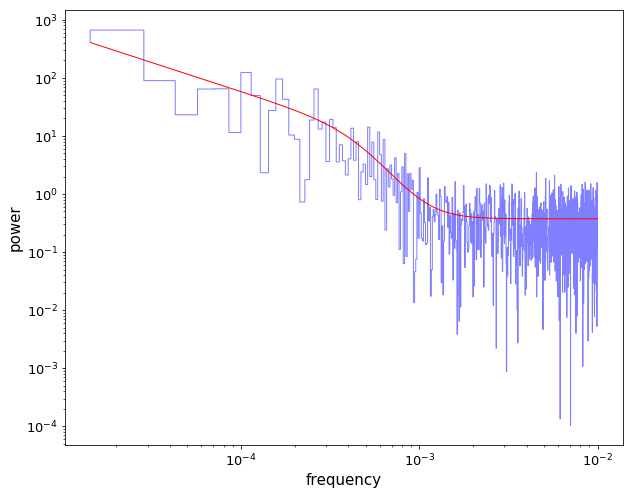

In [18]:
perdata054 = pd.read_csv("perlist054_s.csv")
f_054 = perdata054['f']
per_054 = perdata054['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m054.values[0],m054.values[1],m054.values[2],m054.values[3]

model_054 = []
f_length_054 = len(f_054)
for i in range(f_length_054):
    model_054.append(((f_054[i]**(-alpha_L))/(1+(f_054[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_054, per_054, color="b", alpha=0.5, linewidth=1)
plt.plot(f_054, model_054, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2005(4) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_054(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata054 = pd.read_csv("perlist054_s.csv")
    f = perdata054['f']
    per = perdata054['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata054)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n054=Minuit(twi_minus_loglikelihood_nobreak_054,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-10,-3),limit_alpha=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n054.migrad()

pprint(n054.fval)

FCN = 493.0255156361962 
 TOTAL NCALL = 80 
 NCALLS = 80 
 
 
 EDM = 7.966743526391559e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-6.7106,0.454168,,,-10,-3,No
1,alpha,2.18013,0.138275,,,1,5,No
2,log_poisson,-0.459256,0.0211411,,,-3,3,No


493.0255156361962


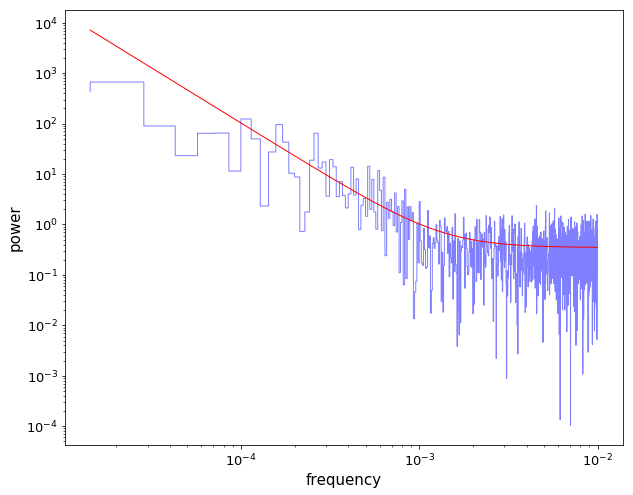

In [21]:
log_A,alpha,log_poisson = n054.values[0],n054.values[1],n054.values[2]

model_nob_054 = []
f_length_054 = len(f_054)
for i in range(f_length_054):
    model_nob_054.append((f_054[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_054, per_054, color="b", alpha=0.5, linewidth=1)
plt.plot(f_054, model_nob_054, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

21.503963149095625


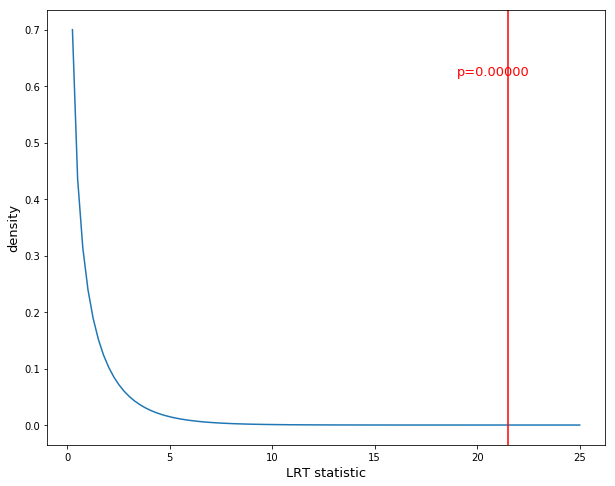

In [22]:
import scipy.stats as stats

# LRT statistic
T = n054.fval-m054.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data01 = pd.read_csv("energy_mrk766_01.csv")  
x01 = data01['x']
y01 = data01['y']
xerr01 = data01['xerr']
yerr01 = data01['yerr']

data051 = pd.read_csv("energy_mrk766_051.csv")  
x051 = data051['x']
y051 = data051['y']
xerr051 = data051['xerr']
yerr051 = data051['yerr']

data054 = pd.read_csv("energy_mrk766_054.csv")  
x054 = data054['x']
y054 = data054['y']
xerr054 = data054['xerr']
yerr054 = data054['yerr']

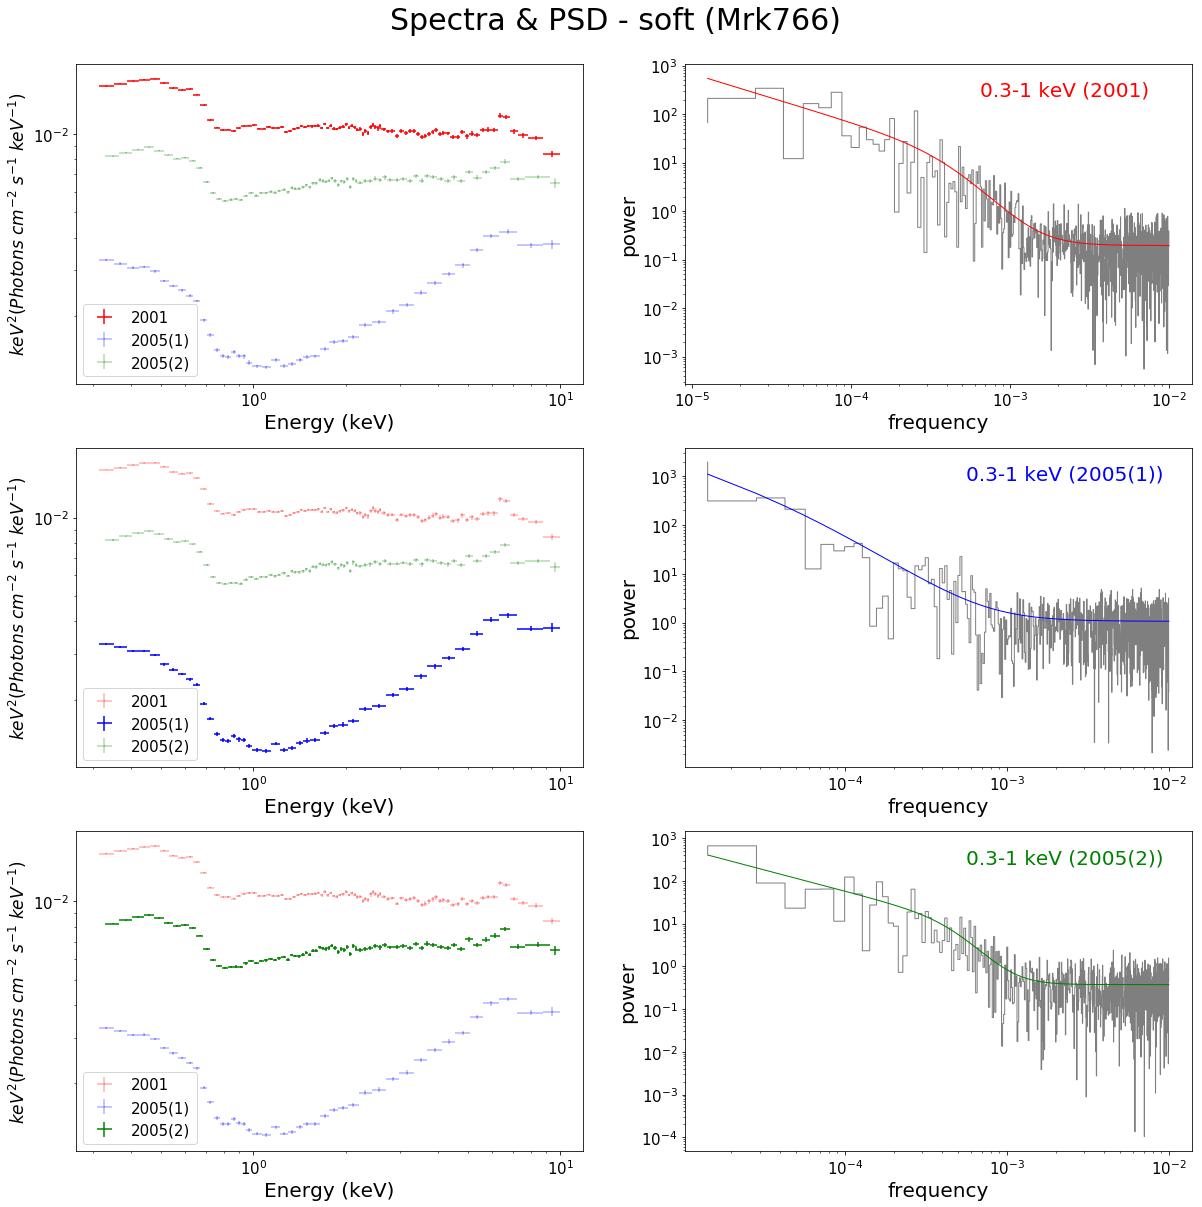

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)


ax1.loglog()
ax1.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', label='2001')
ax1.errorbar(x051, y051, yerr=yerr051, xerr=xerr051, fmt=',b', alpha=0.3, label='2005(1)')
ax1.errorbar(x054, y054, yerr=yerr054, xerr=xerr054, fmt=',g', alpha=0.3, label='2005(2)')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', alpha=0.3, label='2001')
ax3.errorbar(x051, y051, yerr=yerr051, xerr=xerr051, fmt=',b', label='2005(1)')
ax3.errorbar(x054, y054, yerr=yerr054, xerr=xerr054, fmt=',g', alpha=0.3, label='2005(2)')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', alpha=0.3, label='2001')
ax5.errorbar(x051, y051, yerr=yerr051, xerr=xerr051, fmt=',b', alpha=0.3, label='2005(1)')
ax5.errorbar(x054, y054, yerr=yerr054, xerr=xerr054, fmt=',g', label='2005(2)')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)

ax2.loglog()
ax2.step(f_01, per_01, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_01, model_01, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2001)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_051, per_051, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_051, model_051, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2005(1))",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_054, per_054, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_054, model_054, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"0.3-1 keV (2005(2))",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)

plt.suptitle("Spectra & PSD - soft (Mrk766)", x=0.5, y=0.92, fontsize=30)
plt.show()